# <span style='color:darkorchid'> A/B test for an online retailer <br> Comparing Literacy Rates </span>

## Project Overview

Decco is an online retailer that sells home decor items. They recently added ‘Lamps’  as a new category of products which they were not selling before. To generate awareness and boost sales, they want to promote their App. 
<br> Their notifications have succeeded in the past and they are considering sending a message making users aware of this new category, through in-app notification. 
<br> But at the same time, they want to be judicious about any features or releases when it comes to their app because they know that LTV of a customer who has installed their app is much higher. 
<br> They want to be careful so as not to drive users to uninstall the app. 


<br> This project has 4 parts:
* Business Problem
* Data Undrestanding
* Modeling and Evaluation
* Conclusion


<img src="images/problem_10266358.png" width="100" height="100" align=left  >
 
## Part 1: Business Problem

* Because we have seen success through in-app notifications in the past if we send an in-app notification with a promotional offer for Lamps, then the % of users that purchase from the Lamp Category will increase. We can test this hyphotesis by running an A/B test.

* 





 <span style='color:navy'> * Primary Metrics: Conversion Rate <br> * Secondary metrics: Purchase Value <br> * Other metrics: Uninstall rate </span>

In [6]:
# Calculate sample size

<img src="images/survey_10266430.png" width="100" height="100" align=left  >


## Part 2: Data Undrestanding

In [7]:
#Imports and Data Loading

import pandas as pd
import scipy.stats as stats
#from scipy.stats import proportest, ttest_ind
#from statsmodels.stats import proportion_test as proportest
from scipy.stats import binomtest
import scipy

import seaborn as sns
from matplotlib import pyplot as plt



data = pd.read_csv("_AB_Test_Data.csv")
data.head()

,userid,allocation,active_6m,days_since,addtocart_flag,transaction_flag,purchase_value,uninstall_flag
0,257597,treatment,0,236,0,0,NaN,0
1,992329,treatment,1,37,0,0,NaN,0
2,111016,control,1,41,0,0,NaN,0
3,483717,treatment,1,18,0,0,NaN,0
4,951259,control,0,256,0,0,NaN,0


In [8]:
# Treatment indicator - allocation
# Response variables - addtocart_flag, transaction_flag, purchase_value
# Baseline variables - active_6m, days_since
# Other - uninstall_flag

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   userid            100000 non-null  int64  
 1   allocation        100000 non-null  object 
 2   active_6m         100000 non-null  int64  
 3   days_since        100000 non-null  int64  
 4   addtocart_flag    100000 non-null  int64  
 5   transaction_flag  100000 non-null  int64  
 6   purchase_value    13820 non-null   float64
 7   uninstall_flag    100000 non-null  int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 6.1+ MB


In [9]:
data["allocation"].value_counts()

treatment    50000
control      50000
Name: allocation, dtype: int64



##  <span style='color:Blue'> Based on histogram below: </span>

1. The histogram appears right-skewed, meaning there are more frequent purchases towards the lower end of the average purchase value range (left side) and a longer tail extending towards higher average purchase values (right side).
2. The most frequent purchase value range falls somewhere around 50-100 bucks.
3. There are fewer purchases at higher average purchase values (above 100). However, the tail indicates that some customers are willing to spend significantly more.


##  <span style='color:red'> Business insight: </span>

We can analyze what products contribute to the higher end of the purchase value range to understand customer preferences in that segment.

<AxesSubplot:ylabel='Frequency'>

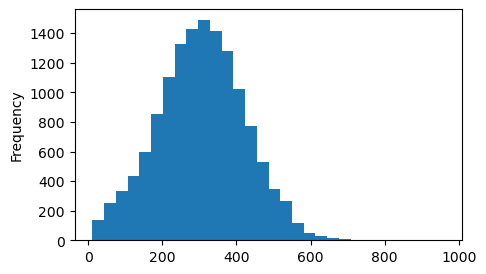

In [10]:
data['purchase_value'].plot.hist(bins = 30, figsize = (5,3))



##  <span style='color:Blue'> Based on histogram below: </span>

1. Active Users: The presence of users across various days since last use indicates some level of active users returning to the app over time. 
2. User Engagement:However, the distribution suggests a decline in user engagement over time.
3. Drop-off Rate: The histogram leans towards the left side, with a higher frequency of users returning within a shorter period (e.g., less than 10 days). This suggests a potential drop-off in user engagement after a certain period of inactivity.
4. We can see a big jump in day 50th which need to investigate more.


##  <span style='color:red'> Business insight: </span>

We can analyze user engagement by demographics or past behavior to see if specific groups exhibit different usage patterns.

<AxesSubplot:ylabel='Frequency'>

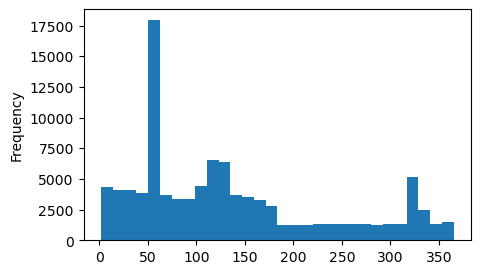

In [11]:
data['days_since'].plot.hist(bins = 30, figsize = (5,3))

In [12]:
data.head(1)

,userid,allocation,active_6m,days_since,addtocart_flag,transaction_flag,purchase_value,uninstall_flag
0,257597,treatment,0,236,0,0,NaN,0


In [13]:
# Check for randomization - baseline variables

data2 = data.groupby(["allocation"]).agg({'transaction_flag':'mean', 'purchase_value':'mean',
                                         'addtocart_flag':'mean', })

#Group means are similar between groups
data2

,transaction_flag,purchase_value,addtocart_flag
allocation,,,
control,0.10118,271.924279,0.23570
treatment,0.17522,323.430082,0.27698


<img src="images/creative-writing_10266412.png" width="100" height="100" align=left  >


## Part 3: Modeling and Evaluation

## Comparing Conversion Rates: prop.test

In [14]:
import scipy.stats.distributions as dist

In [15]:
data.head(1)

,userid,allocation,active_6m,days_since,addtocart_flag,transaction_flag,purchase_value,uninstall_flag
0,257597,treatment,0,236,0,0,NaN,0


In [16]:
contingency_table = pd.crosstab(data["allocation"] ,data["addtocart_flag"]) 
contingency_table

addtocart_flag,0,1
allocation,,
control,38215,11785
treatment,36151,13849


In [17]:
# convert the above numbers into proportions, to get an idea!
pd.crosstab(data["allocation"],data["addtocart_flag"]).apply(lambda r:r/r.sum(),axis=0)

addtocart_flag,0,1
allocation,,
control,0.513877,0.459741
treatment,0.486123,0.540259


Based on contingency table, there is significant difference between proportions of convert rate between treatment and control group.


In [18]:
from scipy.stats import binomtest

In [19]:
data.head(1)

,userid,allocation,active_6m,days_since,addtocart_flag,transaction_flag,purchase_value,uninstall_flag
0,257597,treatment,0,236,0,0,NaN,0


In [20]:
# Assuming 'group' and 'success' (binary: 0 or 1) are your columns

contingency_table = pd.pivot_table(data, values='addtocart_flag', index='allocation', aggfunc='count')
print(contingency_table)

            addtocart_flag
allocation                
control              50000
treatment            50000


In [25]:
contingency_table = pd.crosstab(data["allocation"] ,data["addtocart_flag"]) 
contingency_table

addtocart_flag,0,1
allocation,,
control,38215,11785
treatment,36151,13849


In [27]:
# Perform the test
total_trials = contingency_table.sum().sum()  # Total number of trials

p1 = contingency_table.iloc[0].sum() / total_trials  # Proportion of successes in group 1

pval = binomtest(contingency_table.iloc[0].sum(), total_trials, p1)

pval

BinomTestResult(k=50000, n=100000, alternative='two-sided', proportion_estimate=0.5, pvalue=1.0)

## Comparing Purchase Values: t-test

In [22]:

control= data[data["allocation"] == "control"]

treatment= data[data["allocation"] == "treatment"]

# Find the P-value

stats.ttest_ind(a= control.dropna()["purchase_value"] ,b= treatment.dropna()["purchase_value"] ,
                equal_var=False)

Ttest_indResult(statistic=-23.44362913212496, pvalue=1.0361199370432673e-117)

In [23]:
print(control["purchase_value"].mean())
print(treatment["purchase_value"].mean())

271.92427899728
323.43008177994784





###  <span style='color:darkred'> <br>  Although the avg purchase value in treatment group is higher (18%) than control group, but the high p-value shows this difference is not statisticaly significant. <br> In other words, it’s highly likely that the difference in the two means is due to chance. </span>

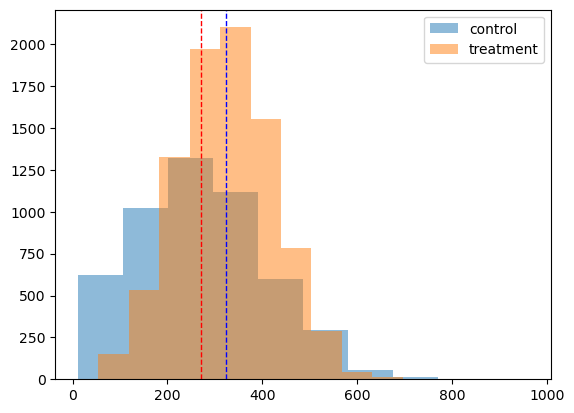

In [25]:
# Plotting the data
plt.hist(control["purchase_value"], alpha=0.5, label='control')
plt.hist(treatment["purchase_value"], alpha=0.5, label='treatment')

plt.axvline(control["purchase_value"].mean(), color='r', linestyle='dashed', linewidth=1)
plt.axvline(treatment["purchase_value"].mean(), color='b', linestyle='dashed', linewidth=1)
plt.legend(loc='upper right')
plt.show()

## transaction_flag

In [28]:
data.head(1)

,userid,allocation,active_6m,days_since,addtocart_flag,transaction_flag,purchase_value,uninstall_flag
0,257597,treatment,0,236,0,0,NaN,0


In [29]:
contingency_table1 = pd.crosstab(data["allocation"] ,data["transaction_flag"]) 
contingency_table1

transaction_flag,0,1
allocation,,
control,44941,5059
treatment,41239,8761


In [30]:
# Perform the test
total_trials1 = contingency_table1.sum().sum()  # Total number of trials

p11 = contingency_table1.iloc[0].sum() / total_trials1  # Proportion of successes in group 1

pval_1 = binomtest(contingency_table1.iloc[0].sum(), total_trials1, p11)

pval_1

BinomTestResult(k=50000, n=100000, alternative='two-sided', proportion_estimate=0.5, pvalue=1.0)

uninstall_flag

In [31]:
contingency_table2 = pd.crosstab(data["allocation"] ,data["uninstall_flag"]) 
contingency_table2

uninstall_flag,0,1
allocation,,
control,48503,1497
treatment,47487,2513


In [ ]:
# Perform the test
total_trials1 = contingency_table1.sum().sum()  # Total number of trials

p11 = contingency_table1.iloc[0].sum() / total_trials1  # Proportion of successes in group 1

pval_1 = binomtest(contingency_table1.iloc[0].sum(), total_trials1, p11)

pval_1

In [32]:
from statsmodels.stats.proportion import proportions_ztest